# Data Pre-process for Oscar Awards

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Import Packages

In [ ]:
import pandas as pd

## Step 1: Data Preprocessing

- Rename column names to be more descriptive

- Change data type

- Drop unnecessary columns

- Drop duplicates

- Group awards categories

In [ ]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BT4222/the_oscar_award.csv')

# Display the first few rows of the dataframe
print(df.head())

   year_film  year_ceremony  ceremony category                 name  \
0       1927           1928         1    ACTOR  Richard Barthelmess   
1       1927           1928         1    ACTOR        Emil Jannings   
2       1927           1928         1  ACTRESS       Louise Dresser   
3       1927           1928         1  ACTRESS         Janet Gaynor   
4       1927           1928         1  ACTRESS       Gloria Swanson   

               film  winner  
0         The Noose   False  
1  The Last Command    True  
2   A Ship Comes In   False  
3        7th Heaven    True  
4    Sadie Thompson   False  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10889 non-null  int64 
 1   year_ceremony  10889 non-null  int64 
 2   ceremony       10889 non-null  int64 
 3   category       10889 non-null  object
 4   name           10884 non-null  object
 5   film           10570 non-null  object
 6   winner         10889 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 521.2+ KB


In [ ]:
# Check Nulls
df.isna().sum()

,0
year_film,0
year_ceremony,0
ceremony,0
category,0
name,5
film,319
winner,0


In [ ]:
# Remove NA
df = df.dropna()

In [ ]:
# Renaming the columns
df = df.rename(columns={'category': 'nomination_category'})
df = df.rename(columns={'name': 'nominee_name'})
df = df.rename(columns={'film': 'film_title'})

df['nominee_name'] = df['nominee_name'].astype(str)
df['film_title'] = df['film_title'].astype(str)

# Dropping columns
df = df.drop(columns=['ceremony'])

In [ ]:
# Broad category grouping with case insensitivity
def categorize_award(category):
    category = category.lower()  # Convert to lowercase for case-insensitive matching
    if 'actor' in category or 'actress' in category:
        return 'Acting'
    elif 'director' in category:
        return 'Directing'
    elif 'picture' in category:
        return 'Best Picture'
    else:
        return 'Technical/Other'

df['category_type'] = df['nomination_category'].apply(categorize_award)
df = df.drop(columns=['nomination_category'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10570 entries, 0 to 10884
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10570 non-null  int64 
 1   year_ceremony  10570 non-null  int64 
 2   nominee_name   10570 non-null  object
 3   film_title     10570 non-null  object
 4   winner         10570 non-null  bool  
 5   category_type  10570 non-null  object
dtypes: bool(1), int64(2), object(3)
memory usage: 505.8+ KB


## Step 2: Feature Engineering

In [ ]:
# Calculate 'total_awards_won' by each movie as an integer, filling NaNs with 0
df['total_awards_won'] = df.groupby('film_title')['winner'].transform('sum').fillna(0).astype(int)
df.head()

,year_film,year_ceremony,nominee_name,film_title,winner,category_type,total_awards_won
0,1927,1928,Richard Barthelmess,The Noose,False,Acting,0
1,1927,1928,Emil Jannings,The Last Command,True,Acting,1
2,1927,1928,Louise Dresser,A Ship Comes In,False,Acting,0
3,1927,1928,Janet Gaynor,7th Heaven,True,Acting,3
4,1927,1928,Gloria Swanson,Sadie Thompson,False,Acting,0


## Step 3: Check Satistics

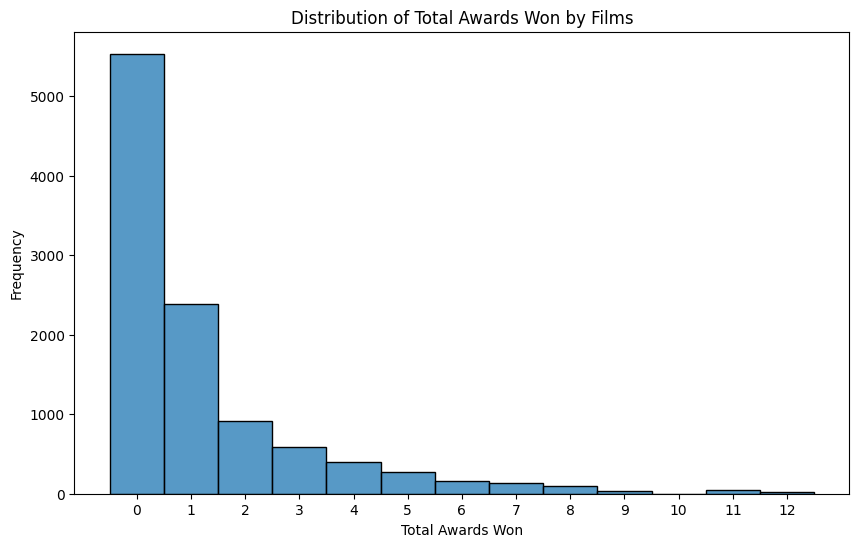

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the bins from 0 to 12 awards, inclusive
bins = range(0, 13)  # Creates bins for each integer from 0 to 12

# Plot the distribution using seaborn with the specified bins
plt.figure(figsize=(10, 6))
sns.histplot(df['total_awards_won'], bins=bins, discrete=True, kde=False)
plt.title("Distribution of Total Awards Won by Films")
plt.xlabel("Total Awards Won")
plt.ylabel("Frequency")
plt.xticks(range(0, 13))  # Ensure x-axis labels are 0 through 12
plt.show()

In [ ]:
# Sort movies by 'total_awards_won' to get the top 10 most awarded films
top_awarded_movies = df[['film_title', 'total_awards_won']].drop_duplicates().sort_values(by='total_awards_won', ascending=False).head(10)
print("Top 10 most awarded movies:")
print(top_awarded_movies)

Top 10 most awarded movies:
                                         film_title  total_awards_won
2780                                        Titanic                12
3474                                        Ben-Hur                11
3719                                West Side Story                11
8366  The Lord of the Rings: The Return of the King                11
6598                               The Last Emperor                 9
7554                            The English Patient                 9
3385                                           Gigi                 9
6252                                        Amadeus                 8
785                              Gone with the Wind                 8
2758                          From Here to Eternity                 8


In [ ]:
# Filter for movies released in the last 20 years
last_20_years = df[df['year_film'] >= 2020]

# Calculate total awards won by each movie and include the release year
top_awarded_movies_last_20_years = (
    last_20_years.groupby(['film_title', 'year_film'])['total_awards_won']
    .max()
    .sort_values(ascending=False)
    .head(20)
)

print(top_awarded_movies_last_20_years)


film_title                         year_film
West Side Story                    2021         11
Oppenheimer                        2023          7
Everything Everywhere All at Once  2022          7
Dune                               2021          6
All Quiet on the Western Front     2022          6
Poor Things                        2023          4
Nomadland                          2020          3
CODA                               2021          3
Ma Rainey's Black Bottom           2020          2
The Zone of Interest               2023          2
Judas and the Black Messiah        2020          2
The Whale                          2022          2
Sound of Metal                     2020          2
Soul                               2020          2
Mank                               2020          2
The Eyes of Tammy Faye             2021          2
Pinocchio                          2020          2
The Father                         2020          2
Encanto                            20

In [ ]:
# Identify movies with unusually high awards counts
outliers = df[df['total_awards_won'] > 15]  # Adjust threshold as necessary
print("Potential outliers in awards count:")
print(outliers[['film_title', 'total_awards_won']])


Potential outliers in awards count:
Empty DataFrame
Columns: [film_title, total_awards_won]
Index: []


In [ ]:
# Descriptive statistics for the date column
year_film_stats = {
    'count': df['year_film'].count(),
    'min': df['year_film'].min(),
    'max': df['year_film'].max(),
    'mean': df['year_film'].mean(),
    'mode': df['year_film'].mode()[0],
    'median': df['year_film'].median(),
    'sd': df['year_film'].std(),
}
print(year_film_stats)

# Count the number of null values in 'column1'
null_count = df['year_film'].isnull().sum()
print(f"Number of null values in 'year_film': {null_count}")

{'count': 10570, 'min': 1927, 'max': 2023, 'mean': 1976.7904446546831, 'mode': 1942, 'median': 1976.0, 'sd': 27.269582489337584}
Number of null values in 'year_film': 0


In [ ]:
year_ceremony_stats = {
    'count': df['year_ceremony'].count(),
    'min': df['year_ceremony'].min(),
    'max': df['year_ceremony'].max(),
    'mean': df['year_ceremony'].mean(),
    'mode': df['year_ceremony'].mode()[0],
    'median': df['year_ceremony'].median(),
    'sd': df['year_ceremony'].std(),
}
print(year_ceremony_stats)

# Count the number of null values in 'column1'
null_count = df['year_ceremony'].isnull().sum()
print(f"Number of null values in 'year_ceremony': {null_count}")

{'count': 10570, 'min': 1928, 'max': 2024, 'mean': 1977.7904446546831, 'mode': 1943, 'median': 1977.0, 'sd': 27.269582489337584}
Number of null values in 'year_ceremony': 0


In [ ]:
# Get distinct count
distinct_count = df['category_type'].nunique()
print(f"Distinct count: {distinct_count}")

# Get distinct categories for the 'movie_genre' column
distinct_genres = df['category_type'].unique()

# Display the distinct genres
print(distinct_genres)

# Count the number of null values in 'column1'
null_count = df['category_type'].isnull().sum()
print(f"Number of null values in 'nomination_category': {null_count}")

Distinct count: 4
['Acting' 'Technical/Other' 'Best Picture' 'Directing']
Number of null values in 'nomination_category': 0


In [ ]:
# Count the number of null values in 'column1'
null_count = df['nominee_name'].isnull().sum()
print(f"Number of null values in 'nominee_name': {null_count}")

Number of null values in 'nominee_name': 0


In [ ]:
# Count the number of null values in 'column1'
null_count = df['film_title'].isnull().sum()
print(f"Number of null values in 'film_title': {null_count}")

Number of null values in 'film_title': 0


In [ ]:
# Get distinct count
distinct_count = df['winner'].nunique()
print(f"Distinct count: {distinct_count}")

# Get distinct categories for the 'movie_genre' column
distinct_genres = df['winner'].unique()

# Display the distinct genres
print(distinct_genres)

# Count the number of null values in 'column1'
null_count = df['winner'].isnull().sum()
print(f"Number of null values in 'winner': {null_count}")

Distinct count: 2
[False  True]
Number of null values in 'winner': 0


In [25]:
# Save the updated DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/BT4222/oscar_awards.csv', index=False)

# Display a message confirming the save
print("Dataset saved as oscar_awards.csv")

Dataset saved as oscar_awards.csv


In [26]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BT4222/oscar_awards.csv')

# Display the first few rows of the dataframe
print(df.head())

df.isna().sum()

   year_film  year_ceremony         nominee_name        film_title  winner  \
0       1927           1928  Richard Barthelmess         The Noose   False   
1       1927           1928        Emil Jannings  The Last Command    True   
2       1927           1928       Louise Dresser   A Ship Comes In   False   
3       1927           1928         Janet Gaynor        7th Heaven    True   
4       1927           1928       Gloria Swanson    Sadie Thompson   False   

  category_type  total_awards_won  
0        Acting                 0  
1        Acting                 1  
2        Acting                 0  
3        Acting                 3  
4        Acting                 0  


,0
year_film,0
year_ceremony,0
nominee_name,0
film_title,0
winner,0
category_type,0
total_awards_won,0
